In [1]:
%cd ..

/home/elmer/dev_debian/working/python3/MakeAIWork3/project_3


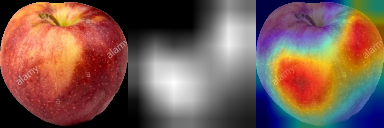

In [2]:
import warnings
warnings.filterwarnings('ignore')
from torchvision import models
import numpy as np
import cv2
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image, \
    deprocess_image, \
    preprocess_image
from PIL import Image
import torch

from cnn.cnn import CNNModel

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

predictor = CNNModel(load_dataset=False)
predictor.model.to(device)
predictor.model.load_state_dict(torch.load(predictor.best_model_params_path))
predictor.model.eval()

image_url = '/home/elmer/dev_debian/working/python3/MakeAIWork3/project_3/sample_apples/normal_apple_44.jpg'
img = cv2.imread(image_url)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Switch from BGR to RGB
img = cv2.resize(img, (128, 128))
img = np.float32(img) / 255
input_tensor = preprocess_image(img, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

# The target for the CAM is the Eft category.
# As usual for classication, the target is the logit output
# before softmax, for that category.
targets = [ClassifierOutputTarget(0)]
target_layers = [predictor.model.conv6]
with GradCAM(model=predictor.model, target_layers=target_layers) as cam:
    grayscale_cams = cam(input_tensor=input_tensor.to(device), targets=targets)
    cam_image = show_cam_on_image(img, grayscale_cams[0, :], use_rgb=True)
cam = np.uint8(255*grayscale_cams[0, :])
cam = cv2.merge([cam, cam, cam])
images = np.hstack((np.uint8(255*img), cam , cam_image))
Image.fromarray(images)